In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

In [ ]:
df=pd.read_csv("Train.csv")


In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
df.shape

(29451, 12)

In [ ]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [ ]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [ ]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29446    False
29447    False
29448    False
29449    False
29450    False
Length: 29451, dtype: bool

In [ ]:
df.duplicated().sum()

401

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Count'>

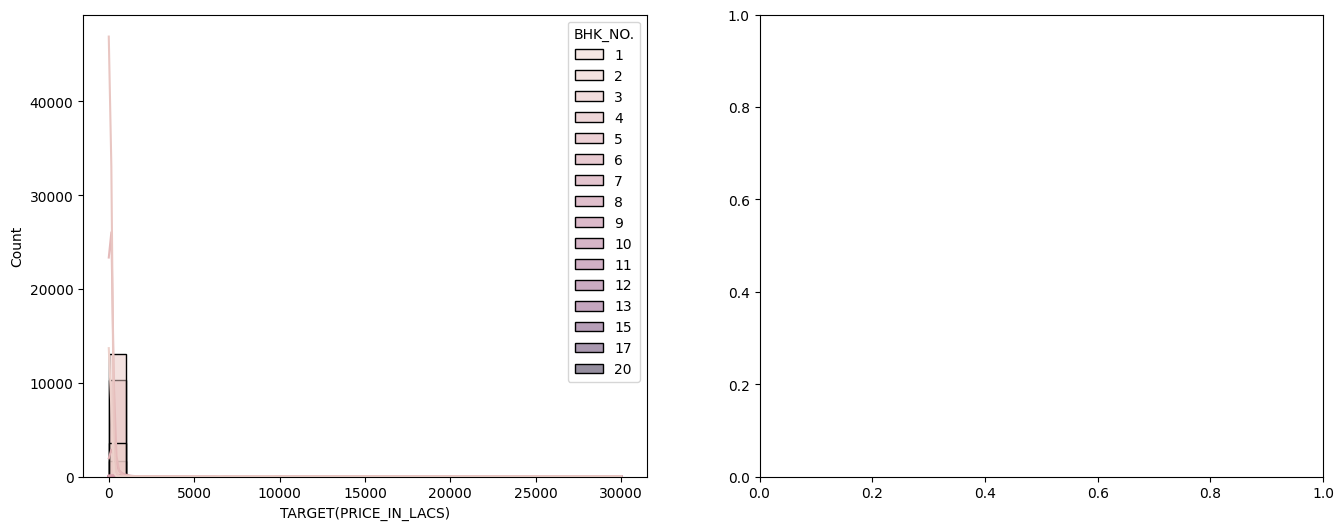

In [ ]:
fig,axis=plt.subplots(1,2,figsize=(16,6))
plt.subplot(121)
sns.histplot(data=df,x='TARGET(PRICE_IN_LACS)',bins=30,kde=True,hue='BHK_NO.')

<ipython-input-15-5edbdf4a554a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


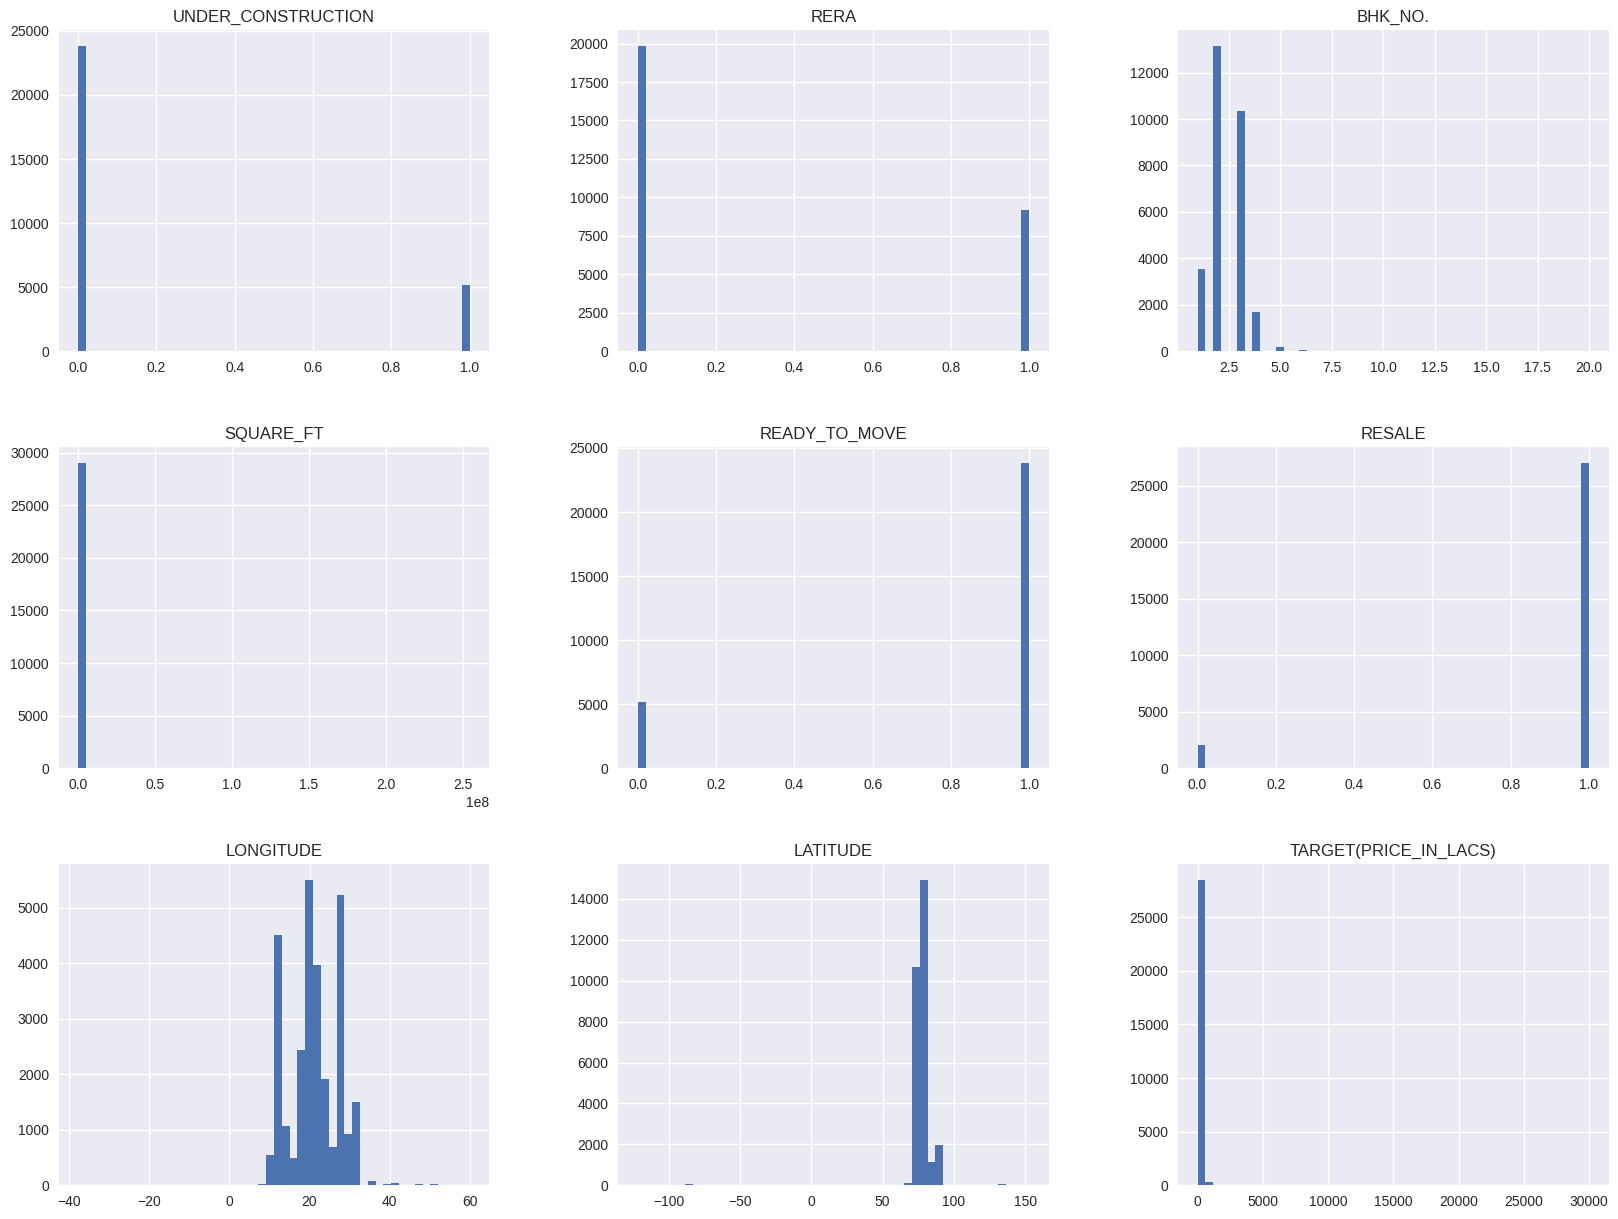

In [ ]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

<ipython-input-16-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

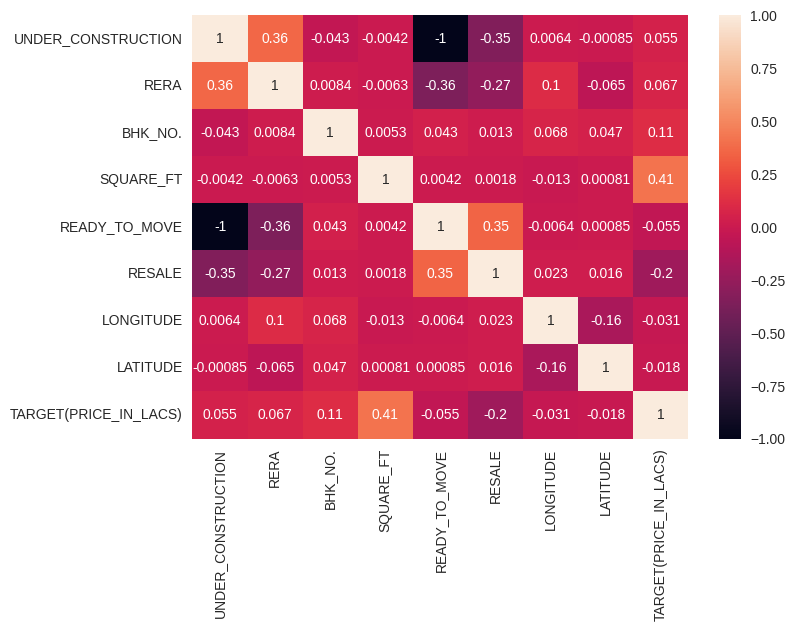

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df['POSTED_BY'].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [ ]:
to_numeric={'Owner':0, 'Dealer':1, 'Builder':2}
df.replace(to_numeric,inplace=True)

In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,1,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,0,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,0,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,1,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
df['BHK_OR_RK'].unique()
a={'BHK':0,'RK':1}
df.replace(a,inplace=True)

In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,0,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,0,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
df.drop('ADDRESS',axis=1,inplace=True)

In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0
3,0,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5


In [ ]:
df['TARGET_PRICE_IN_LACS']=df['TARGET(PRICE_IN_LACS)'].astype(int)

In [ ]:
df['TARGET_PRICE_IN_LACS'].astype(int)

0        55
1        51
2        43
3        62
4        60
         ..
29446    45
29447    16
29448    27
29449    67
29450    27
Name: TARGET_PRICE_IN_LACS, Length: 29050, dtype: int64

In [ ]:
df.drop('TARGET(PRICE_IN_LACS)',axis=1,inplace=True)

In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET_PRICE_IN_LACS
0,0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51
2,0,0,0,2,0,933.159722,1,1,12.778033,77.632191,43
3,0,0,1,2,0,929.921143,1,1,28.642300,77.344500,62
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60


In [ ]:
X=df.drop(labels=["TARGET_PRICE_IN_LACS"],axis=1)
y=df.TARGET_PRICE_IN_LACS

###machine learning model

In [ ]:

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:

from sklearn.metrics import mean_squared_error
XB=XGBRegressor()
XB.fit(X_train, y_train)
y_predict= XB.predict(X_test)
XB_score= mean_absolute_percentage_error(y_predict,y_test)
print(XB_score)


0.31343565521425926


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
warnings.filterwarnings("ignore")
RF = RandomForestRegressor(n_estimators=14)
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

# Accuracy score
RF_SC = r2_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

95.24% Accurate


In [ ]:
RF_SC

0.9524235839335876

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_predict = model_SVR.predict(X_test)

print((y_test, y_predict))

(28441    200
6715      95
10106     55
7793     220
21130     56
        ... 
13660     39
24418     38
11390     54
4201      40
20101    270
Name: TARGET_PRICE_IN_LACS, Length: 5810, dtype: int64, array([60.90061356, 60.89478177, 60.89660936, ..., 60.89788502,
       60.89707859, 60.90212374]))


In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,r2_score,r2_score

#mean_absolute_error(y_pred,y_test), r2_score(y_pred,y_test)

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_predict= model_LR.predict(X_test)

print(r2_score(y_test, y_predict))


0.0764384755586075


In [ ]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_prediction=lin_reg_model.predict(X_train)
y_prediction

array([ 95.34657221,  57.28187251, 103.25877188, ...,  55.85351502,
       122.81445297,  84.04902543])

In [ ]:
rmse=np.sqrt(mean_squared_error(y_train,y_prediction))
rmse

575.6114332337946

In [ ]:
r2_score(y_train,y_prediction)

0.25301598278850546

###Decission Tree

In [ ]:
decision_tree_model= DecisionTreeRegressor()
decision_tree_model.fit(X_train,y_train)
y_prediction_tree=decision_tree_model.predict(X_train)

y_prediction_tree_test=decision_tree_model.predict(X_test)
y_prediction_tree_test

print("RMSE:",np.sqrt(mean_squared_error(y_train,y_prediction_tree)))
print("R_square:",r2_score(y_train,y_prediction_tree))

RMSE: 3.2770902562328224
R_square: 0.9999757880765755


###RandomForest

In [ ]:
random_forest_model=RandomForestRegressor(n_estimators=200, random_state=7)
random_forest_model.fit(X_train,y_train)

y_prediction_random_forest=random_forest_model.predict(X_train)

y_prediction_random_forest_test=random_forest_model.predict(X_test)


print("RMSE:",np.sqrt(mean_squared_error(y_train,y_prediction_random_forest)))
print("R_square:",r2_score(y_train,y_prediction_random_forest))

RMSE: 79.41437681946739
R_square: 0.985781599249857
